## Zero-Shot Klassifikation mit CLIP (openai/clip-vit-large-patch14)

In [1]:
#Zero-Shot-Modell CLIP von Hugging Face laden
from transformers import pipeline

checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification")

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [2]:
from datasets import load_dataset, DatasetDict

# Datensatz laden 
dataset = load_dataset("imagefolder", data_dir="animals")
dataset

Resolving data files:   0%|          | 0/5400 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5400
    })
})

In [5]:
# Alle Klassennamen auflisten

label_names = dataset['train'].features['label'].names
print(label_names)

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


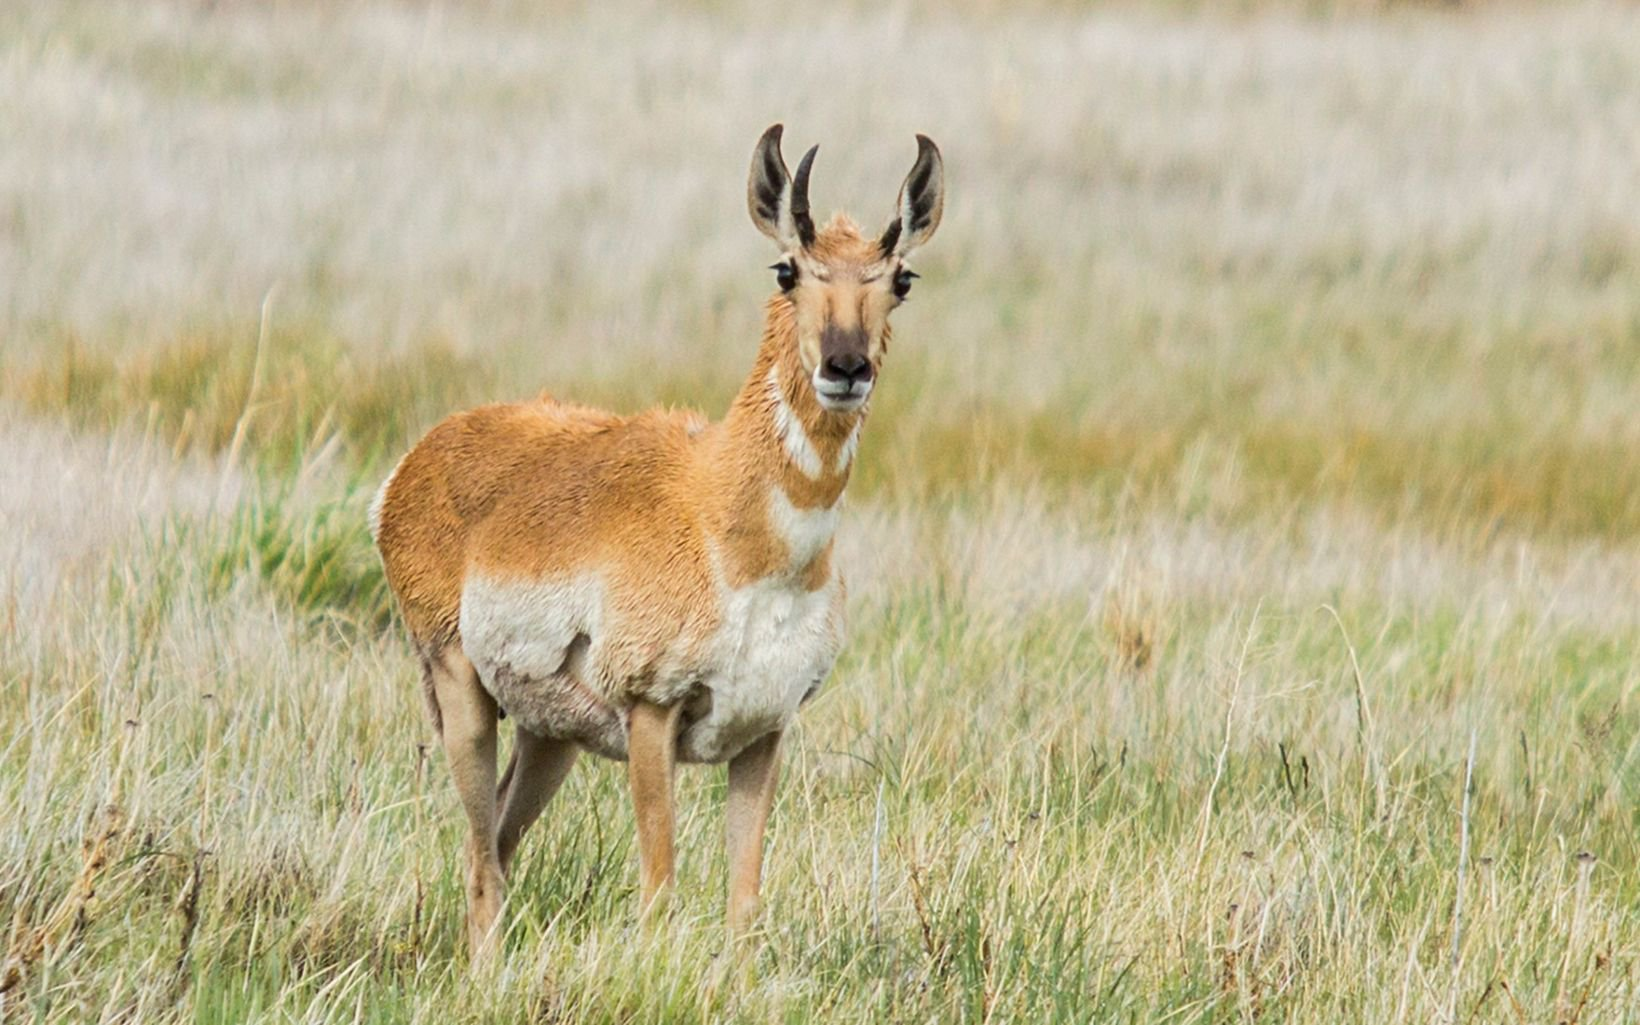

In [6]:
#erste Bild aus dem Trainingsdatensatz wird geladen und angezeigt(zur visuellen Kontrolle)
dataset['train'][0]['image']

In [8]:
from tqdm import tqdm
from PIL import Image

# Alle Tierkategorien als mögliche Labels definieren
labels_animals = label_names

# Ergebnislisten für die tatsächlichen und vorhergesagten Labels
true_labels = []
predicted_labels = []

# Anzahl Trainingsdaten
num_samples = len(dataset['train'])


In [9]:
# Zero-Shot Vorhersage
for i in tqdm(range(num_samples)):

    # Bilder aus Datensatz holen
    image = dataset['train'][i]['image']
    # Zero-Shot Prediction mit CLIP
    results = detector(image, candidate_labels=labels_animals)
    # Nach höchsten Score sortieren
    sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)
    predicted_label = sorted_results[0]['label']
    # Tatsächliches Label
    true_label_idx = dataset['train'][i]['label']
    true_label = labels_animals[true_label_idx]
    # Ergebnisse speichern
    true_labels.append(true_label)
    predicted_labels.append(predicted_label)

100%|██████████| 5400/5400 [13:04<00:00,  6.89it/s]


In [11]:
#Vorhersagen evaluieren mit Metriken
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Metriken berechnen
# Accuracy = Wie viele Vorhersagen insgesamt waren korrekt in %?
accuracy = accuracy_score(true_labels, predicted_labels)
# Precision = Wie viele der als X vorhergesagten Bilder waren wirklich X in %?
precision = precision_score(true_labels, predicted_labels, average='weighted', labels=labels_animals, zero_division=0)
# Recall = Wie viele der echten X-Klassen hat das Modell auch wirklich gefunden in %?
recall = recall_score(true_labels, predicted_labels, average='weighted', labels=labels_animals, zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9631
Precision: 0.9712
Recall: 0.9631
